In [17]:
import numpy as np
import tensorflow as tf

tf.enable_eager_execution()

### tf.GradientTape() and gradient

- $z = x^2 \cdot y + y + 2$

In [21]:
x = tf.convert_to_tensor(3.0)
y = tf.convert_to_tensor(4.0)

with tf.GradientTape() as t:
    t.watch([x, y])
    z = tf.multiply(tf.square(x), y) + y + 2
    print(z, end="\n\n")

# Derivative of z with respect to the original input tensor x
grad = t.gradient(z, [x, y])

print(grad[0], end="\n\n")
print(grad[1], end="\n\n")

tf.Tensor(42.0, shape=(), dtype=float32)

tf.Tensor(24.0, shape=(), dtype=float32)

tf.Tensor(10.0, shape=(), dtype=float32)



- $y = sigmoid(x)$

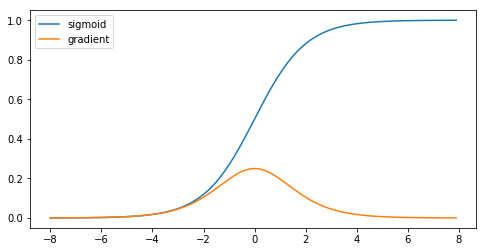

In [261]:
from matplotlib import pyplot as plt

x = tf.convert_to_tensor(np.arange(-8.0, 8.0, 0.1))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.sigmoid(x)
    
grad = t.gradient(y, x)

plt.figure(figsize=(8, 4))
plt.plot(x.numpy(), y.numpy())
plt.plot(x.numpy(), grad.numpy())
plt.legend(['sigmoid', 'gradient'])
plt.show()

### Linear Model

In [343]:
NUM_LAYERS = 2

In [352]:
class Model(object):
    def __init__(self):
        # Initialize variable to (5.0, 0.0)
        # In practice, these should be initialized to random values.
        self.layers = []
        for idx in range(NUM_LAYERS):
            self.layers.append({
                "W": tf.Variable(5.0, name="W"),
                "b": tf.Variable(0.0, name="b")                
            })
    
    def __call__(self, x):
        input_value = x
        for idx in range(NUM_LAYERS):
            output_value = self.layers[idx]["W"] * input_value + self.layers[idx]["b"]
            input_value = output_value
            
        return output_value
    
model = Model()

print(model(3.0).numpy())

75.0


In [353]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [383]:
TRUE_PARAMS = []
for idx in range(NUM_LAYERS):
    TRUE_PARAMS.append({
        "W": 3.0, "b": 2.0
    })

NUM_EXAMPLES = 1000

X = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])

input_value = X 
for idx in range(NUM_LAYERS):
    y = TRUE_PARAMS[idx]["W"] * input_value + TRUE_PARAMS[idx]["b"] + noise
    input_value = y

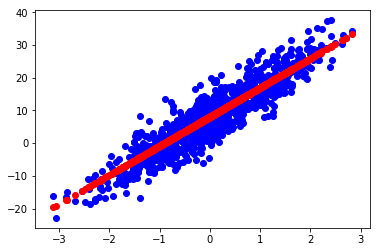

Current loss: 
16.985453


In [384]:
import matplotlib.pyplot as plt

plt.scatter(X, y, c='b')
plt.scatter(X, model(X), c='r')
plt.show()

print('Current loss: '),
print(loss(model(X), y).numpy())

In [385]:
def train(model, X, y, learning_rate):
    params = [model.layers[idx]["W"] for idx in range(NUM_LAYERS)]
    params = params + [model.layers[idx]["b"] for idx in range(NUM_LAYERS)]
    
    with tf.GradientTape() as t:
        t.watch(params)
        current_loss = loss(model(X), y)
        
    grad_params = t.gradient(current_loss, params)
    for idx in range(NUM_LAYERS):
        model.layers[idx]["W"] = model.layers[idx]["W"] - learning_rate * grad_params[idx]
        model.layers[idx]["b"] = model.layers[idx]["b"] - learning_rate * grad_params[idx + NUM_LAYERS]

Epoch  0: loss=328.26044
Epoch  1: loss=46.88785
Epoch  2: loss=33.86259
Epoch  3: loss=26.77554
Epoch  4: loss=22.61965
Epoch  5: loss=20.16623
Epoch  6: loss=18.72875
Epoch  7: loss=17.89239
Epoch  8: loss=17.40756
Epoch  9: loss=17.12680
Epoch 10: loss=16.96416
Epoch 11: loss=16.86986
Epoch 12: loss=16.81511
Epoch 13: loss=16.78331
Epoch 14: loss=16.76481
Epoch 15: loss=16.75405
Epoch 16: loss=16.74779
Epoch 17: loss=16.74414
Epoch 18: loss=16.74201
Epoch 19: loss=16.74078
Epoch 20: loss=16.74006
Epoch 21: loss=16.73964
Epoch 22: loss=16.73940
Epoch 23: loss=16.73925
Epoch 24: loss=16.73917
Epoch 25: loss=16.73912
Epoch 26: loss=16.73909
Epoch 27: loss=16.73908
Epoch 28: loss=16.73907
Epoch 29: loss=16.73906


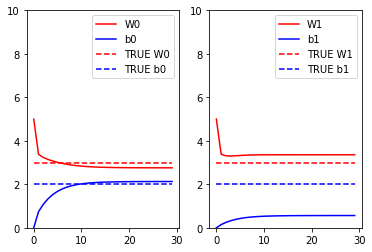

In [386]:
# Collect the history of W-values and b-values to plot later
model = Model()

Ws, bs = [], []
for idx in range(NUM_LAYERS):
    Ws.append([])
    bs.append([])
    
epochs = range(30)
for epoch in epochs:
    for idx in range(NUM_LAYERS):
        Ws[idx].append(model.layers[idx]["W"].numpy())
        bs[idx].append(model.layers[idx]["b"].numpy())
    current_loss = loss(model(X), y)
    
    train(model, X, y, learning_rate=0.01)
    print('Epoch {0:2d}: loss={1:.5f}'.format(epoch, current_loss))

# Let's plot it all
f, ax = plt.subplots(1, NUM_LAYERS)
for idx in range(NUM_LAYERS):
    ax[idx].plot(epochs, Ws[idx], 'r', epochs, bs[idx], 'b')
    ax[idx].plot(
        epochs, [TRUE_PARAMS[idx]["W"] for _ in epochs], 'r--', 
        epochs, [TRUE_PARAMS[idx]["b"] for _ in epochs], 'b--'
    )
    ax[idx].legend(['W'+str(idx), 'b'+str(idx), 'TRUE W'+str(idx), 'TRUE b'+str(idx)])
    ax[idx].set_ylim(0, 10)

f.show()